In [1]:
from common import *
from process_ntuples import *
from process_df import *
from plotting import *
from cuts import apply_cuts, apply_pt_cut
import matplotlib.pyplot as plt
import pickle

import tensorflow as tf
from tensorflow.keras import Model
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras import layers

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from tensorflow.keras.callbacks import EarlyStopping

#weights and biases imports
import wandb
from wandb.keras import WandbMetricsLogger, WandbModelCheckpoint, WandbCallback

Welcome to JupyROOT 6.28/00


2023-04-20 17:09:51.981226: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-04-20 17:09:53.958298: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


$D^{+}$ : 411

$\Lambda_C^{+}$ : 4122

Apply Cuts Fiducial Region cuts ($𝐷^{+}$ $𝑝_T$ > 8 GeV, |𝜂| < 2.2). ***See cuts.py on how the cuts are applied***

In [2]:
print(tf.config.list_physical_devices('GPU'))
# Check if tensorflow is using GPU
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

[]
Num GPUs Available:  0


2023-04-16 21:17:16.368459: E tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:266] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected


In [2]:
dir_path = "/global/cfs/cdirs/atlas/gottino/Charm/Analysis/run_batch_gup/ntuples"

files = os.listdir(dir_path)

DMesonsTTree = process_ntuple(dir_path, files[0])
LambdaMesonsTTree = process_ntuple(dir_path, files[1])

branches = ["DMesons_pt", "DMesons_eta", "DMesons_m", "DMesons_fitOutput__Lxy", "DMesons_costhetastar", "DMesons_pdgId", 
            "DMesons_daughterInfo__pt", "DMesons_daughterInfo__eta", "DMesons_daughterInfo__phi", "DMesons_daughterInfo__pdgId"]

print(files)

['CharmAnalysis.mc.ForcedDecay.Dplus.tree.root', 'CharmAnalysis.mc.ForcedDecay.LabmdaC.tree.root']


In [3]:
DMesons_df = show(0, DMesonsTTree, branches, 2000000)
DMesons_df = remove_empty(DMesons_df)

DMesons_df["DMesons_pt"] = DMesons_df["DMesons_pt"].apply(divide_by_1000)
DMesons_df["DMesons_daughterInfo__pt"] = DMesons_df["DMesons_daughterInfo__pt"].apply(divide_by_1000)
for col in DMesons_df.columns:
    DMesons_df[col] = DMesons_df[col].apply(list)
DMesons_df = apply_cuts(DMesons_df)

In [4]:
DMesons_df

,DMesons_pt,DMesons_eta,DMesons_m,DMesons_fitOutput__Lxy,DMesons_costhetastar,DMesons_pdgId,DMesons_daughterInfo__pt,DMesons_daughterInfo__eta,DMesons_daughterInfo__phi,DMesons_daughterInfo__pdgId
0,[10.047125],[0.08182407170534134],[1862.4176025390625],[2.3395302295684814],[0.25487038493156433],[411],"[[6.094892978668213, 1.3074619770050049, 2.733...","[(0.15998553, 0.011107716, -0.0614343)]","[(2.6128821, 2.7195172, 2.9228168)]","[(-321, 211, 211)]"
1,"[18.9937421875, 18.9937421875]","[-1.6619627475738525, -1.6619627475738525]","[1853.90625, 2398.886962890625]","[1.9184143543243408, 1.9184143543243408]","[-0.36730244755744934, -0.0650731548666954]","[411, 4122]","[[6.457057952880859, 5.970093250274658, 6.6375...","[(-1.608788, -1.6307458, -1.7315177), (-1.7326...","[(-0.371787, -0.5164238, -0.4971406), (-0.4966...","[(-321, 211, 211), (2212, -321, 211)]"
2,"[10.118494140625, 10.118494140625]","[0.041659336537122726, 0.041659336537122726]","[1874.203125, 2468.1806640625]","[2.8901257514953613, 2.8901257514953613]","[0.06833142042160034, 0.4276972711086273]","[411, 4122]","[[3.7944977283477783, 3.3083105087280273, 3.06...","[(-0.073717244, 0.22605924, -0.017923404), (0....","[(0.753864, 0.6827104, 0.920779), (0.6827104, ...","[(-321, 211, 211), (2212, -321, 211)]"
3,"[12.579470703125, 12.579470703125]","[-1.1025604009628296, -1.1025604009628296]","[1884.987060546875, 2220.384521484375]","[0.9249186515808105, 0.9249186515808105]","[-0.5603189468383789, -0.41332852840423584]","[411, 4122]","[[3.7815563678741455, 7.396467208862305, 1.412...","[(-0.9284433, -1.182188, -1.1012387), (-1.1821...","[(0.8518817, 0.7419038, 0.77916163), (0.741903...","[(-321, 211, 211), (2212, -321, 211)]"
4,[36.1288359375],[0.6598162055015564],[2235.69873046875],[0.3584118187427521],[0.19036155939102173],[4122],"[[18.936317443847656, 15.39889907836914, 1.803...","[(0.69086045, 0.62282157, 0.63955635)]","[(0.857847, 0.81737196, 0.7582323)]","[(2212, -321, 211)]"
...,...,...,...,...,...,...,...,...,...,...
823353,[19.1050703125],[1.6708742380142212],[1802.5220947265625],[0.5411524176597595],[0.5503742098808289],[411],"[[12.198583602905273, 2.20495867729187, 4.7119...","[(1.705293, 1.5110217, 1.6457342)]","[(2.8939261, 2.7120652, 2.8616462)]","[(-321, 211, 211)]"
823354,"[35.5684921875, 35.5684921875]","[-1.688397765159607, -1.688397765159607]","[1844.779541015625, 2206.408203125]","[13.070379257202148, 13.070379257202148]","[-0.9140324592590332, -0.8278874754905701]","[411, 4122]","[[5.796909809112549, 20.56328582763672, 9.2475...","[(-1.6683935, -1.7061399, -1.6597538), (-1.706...","[(1.4682562, 1.4755678, 1.4053382), (1.4755678...","[(-321, 211, 211), (2212, -321, 211)]"
823355,"[8.96414453125, 8.96414453125]","[-2.151238203048706, -2.151238203048706]","[1906.624267578125, 2233.773193359375]","[1.6992524862289429, 1.6992524862289429]","[0.1967991143465042, 0.495256245136261]","[411, 4122]","[[3.0222578048706055, 5.220008850097656, 0.736...","[(-2.0755956, -2.2418754, -1.6611706), (-2.241...","[(1.9180546, 1.8532572, 2.0587387), (1.8532572...","[(-321, 211, 211), (2212, -321, 211)]"
823356,[17.66424609375],[-0.09207434207201004],[1886.3043212890625],[1.2944053411483765],[0.28153401613235474],[411],"[[9.11902904510498, 5.195584774017334, 3.37626...","[(-0.045325126, -0.065605104, -0.25413564)]","[(1.7839004, 1.9068127, 1.8262501)]","[(-321, 211, 211)]"


In [5]:
Lambda_df = show(0, LambdaMesonsTTree, branches, 2000000)
Lambda_df = remove_empty(Lambda_df)

Lambda_df["DMesons_pt"] = Lambda_df["DMesons_pt"].apply(divide_by_1000)
Lambda_df["DMesons_daughterInfo__pt"] = Lambda_df["DMesons_daughterInfo__pt"].apply(divide_by_1000)
for col in Lambda_df.columns:
    Lambda_df[col] = Lambda_df[col].apply(list)
Lambda_df = apply_cuts(Lambda_df)

In [6]:
Lambda_df

,DMesons_pt,DMesons_eta,DMesons_m,DMesons_fitOutput__Lxy,DMesons_costhetastar,DMesons_pdgId,DMesons_daughterInfo__pt,DMesons_daughterInfo__eta,DMesons_daughterInfo__phi,DMesons_daughterInfo__pdgId
0,"[15.8373623046875, 15.8373623046875]","[-1.9853405952453613, -1.9853405952453613]","[2277.830078125, 2369.549072265625]","[0.04267885163426399, 0.04267885163426399]","[-0.2451278269290924, -0.17632918059825897]","[4122, 4122]","[[6.491756916046143, 3.2679483890533447, 6.113...","[(-2.0230656, -2.0707278, -1.8890115), (-1.889...","[(-2.1058285, -2.2039685, -2.201573), (-2.2013...","[(2212, -321, 211), (2212, -321, 211)]"
1,"[98.7876796875, 98.7876796875]","[-0.2930956184864044, -0.2930956184864044]","[1919.40869140625, 2260.435791015625]","[2.1269333362579346, 2.1269333362579346]","[0.06200433894991875, 0.3847692906856537]","[411, 4122]","[[29.078584671020508, 10.136245727539062, 59.8...","[(-0.28745878, -0.29004973, -0.29698882), (-0....","[(-2.6987991, -2.6463094, -2.698718), (-2.6987...","[(-321, 211, 211), (2212, -321, 211)]"
2,[8.6058642578125],[0.07536902278661728],[2293.048583984375],[0.09962315112352371],[0.4434269666671753],[4122],"[[2.7384893894195557, 4.709741592407227, 1.240...","[(0.19276412, 0.01101852, 0.053698417)]","[(-2.1192122, -1.8384731, -2.1108038)]","[(2212, -321, 211)]"
3,[11.53853515625],[0.2006414383649826],[2288.4326171875],[0.48169323801994324],[0.9700170755386353],[4122],"[[2.246781587600708, 7.883712291717529, 1.4038...","[(0.20760234, 0.22167633, 0.07100553)]","[(-2.8044589, -2.8241496, -2.8006365)]","[(2212, -321, 211)]"
4,[29.4526484375],[0.05501718819141388],[2301.531494140625],[1.2502720355987549],[0.7273651361465454],[4122],"[[8.355555534362793, 18.87540626525879, 2.2310...","[(0.10226753, 0.028720934, 0.09831465)]","[(1.4927285, 1.5366541, 1.5769836)]","[(2212, -321, 211)]"
...,...,...,...,...,...,...,...,...,...,...
712648,"[34.463046875, 34.463046875]","[0.31471043825149536, 0.31471043825149536]","[1740.138671875, 2299.086181640625]","[1.5627269744873047, 1.5627269744873047]","[0.1562846302986145, 0.4890439212322235]","[411, 4122]","[[15.651188850402832, 5.544079780578613, 13.24...","[(0.3235349, 0.37399396, 0.2787361), (0.278787...","[(0.4758191, 0.5486185, 0.5259811), (0.5257968...","[(-321, 211, 211), (2212, -321, 211)]"
712649,[21.214580078125],[-1.1575630903244019],[2294.565673828125],[0.4024292826652527],[-0.8603967428207397],[4122],"[[14.745858192443848, 2.744957447052002, 3.758...","[(-1.1659735, -1.0675877, -1.1798809)]","[(2.3274233, 2.2858722, 2.182565)]","[(2212, -321, 211)]"
712650,[78.9265390625],[0.9490858316421509],[2278.0],[3.1103579998016357],[-0.23155681788921356],[4122],"[[22.820960998535156, 17.21006965637207, 38.08...","[(0.95355487, 0.96059924, 0.9411635)]","[(0.8717007, 0.89668804, 0.8914601)]","[(2212, -321, 211)]"
712651,"[8.3078798828125, 8.3078798828125]","[1.7236647605895996, 1.7236647605895996]","[2279.513427734375, 2440.34130859375]","[0.27863630652427673, 0.27863630652427673]","[-0.4692881405353546, -0.40096166729927063]","[4122, 4122]","[[4.055630683898926, 1.4534549713134766, 2.834...","[(1.6344042, 2.0164008, 1.6586056), (1.6573379...","[(-1.7249979, -1.4534848, -1.7085202), (-1.708...","[(2212, -321, 211), (2212, -321, 211)]"


In [24]:
# Lambda_df = generate_df(LambdaMesonsTTree, branches, 100)
# Lambda_df = apply_cuts(Lambda_df)
# Lambda_df

In [4]:
DMesons_df = load("DMesons_df")
DMesons_df

,DMesons_pt,DMesons_eta,DMesons_m,DMesons_fitOutput__Lxy,DMesons_costhetastar,DMesons_pdgId
0,[10.047125],[0.08182407170534134],[1862.4176025390625],[2.3395302295684814],[0.25487038493156433],[411]
1,"[18.9937421875, 18.9937421875]","[-1.6619627475738525, -1.6619627475738525]","[1853.90625, 2398.886962890625]","[1.9184143543243408, 1.9184143543243408]","[-0.36730244755744934, -0.0650731548666954]","[411, 4122]"
2,"[10.118494140625, 10.118494140625]","[0.041659336537122726, 0.041659336537122726]","[1874.203125, 2468.1806640625]","[2.8901257514953613, 2.8901257514953613]","[0.06833142042160034, 0.4276972711086273]","[411, 4122]"
3,"[12.579470703125, 12.579470703125]","[-1.1025604009628296, -1.1025604009628296]","[1884.987060546875, 2220.384521484375]","[0.9249186515808105, 0.9249186515808105]","[-0.5603189468383789, -0.41332852840423584]","[411, 4122]"
4,[36.1288359375],[0.6598162055015564],[2235.69873046875],[0.3584118187427521],[0.19036155939102173],[4122]
...,...,...,...,...,...,...
7417090,[17.96],[-0.6264557838439941],[1865.6043701171875],[5.87862491607666],[0.45278045535087585],[411]
7417091,"[62.91061328125, 62.91061328125]","[0.2775037884712219, 0.2775037884712219]","[1847.262451171875, 2131.1259765625]","[11.870012283325195, 11.870012283325195]","[-0.9544855356216431, -0.9355815052986145]","[411, 4122]"
7417092,"[14.8181767578125, 14.8181767578125]","[-2.1479332447052, -2.1479332447052]","[1836.0997314453125, 2165.72412109375]","[2.027026653289795, 2.027026653289795]","[-0.9712575674057007, -0.9517184495925903]","[411, 4122]"
7417093,[39.3814296875],[1.5503557920455933],[2210.86669921875],[0.17065481841564178],[-0.332907497882843],[4122]


In [27]:
Lambda_df = remove_duplicates(Lambda_df)

Removed 34651 duplicate particles


In [28]:
save(Lambda_df, "Lambda_df_daughter_df")

In [29]:
len(Lambda_df)

678002

In [9]:
DMesons_df = DMesons_df.head(500000)

In [30]:
#separates each particle of the event into it's own event in a new data frame (for training)
dfs = []
for index, row in Lambda_df.iterrows():
    
    #reco Ds
    pts = row['DMesons_pt']
    etas = row['DMesons_eta']
    ms = row['DMesons_m']
    lxys = row['DMesons_fitOutput__Lxy']
    costhetastars = row['DMesons_costhetastar']
    pdgids = row["DMesons_pdgId"]
    
    #reco Ds Daughter info
    daughter_pts = row["DMesons_daughterInfo__pt"]
    daughter_etas = row["DMesons_daughterInfo__eta"]
    daughter_phis = row["DMesons_daughterInfo__phi"]
    daughter_pdgIds = row["DMesons_daughterInfo__pdgId"]
        
    d = {Lambda_df.columns[0]: pts, Lambda_df.columns[1]: etas, Lambda_df.columns[2]: ms, Lambda_df.columns[3]: lxys, 
         Lambda_df.columns[4]: costhetastars, Lambda_df.columns[5]: pdgids, 
         
         Lambda_df.columns[6]: daughter_pts, Lambda_df.columns[7]: daughter_etas, Lambda_df.columns[8]: daughter_phis, 
         Lambda_df.columns[9]: daughter_pdgIds}
    df = pd.DataFrame(data=d)
    
    dfs.append(df)

df = pd.concat(dfs)
df = df.reset_index(drop = True)
df

,DMesons_pt,DMesons_eta,DMesons_m,DMesons_fitOutput__Lxy,DMesons_costhetastar,DMesons_pdgId,DMesons_daughterInfo__pt,DMesons_daughterInfo__eta,DMesons_daughterInfo__phi,DMesons_daughterInfo__pdgId
0,15.837362,-1.985341,2277.830078,0.042679,-0.245128,4122,"[6.491756916046143, 3.2679483890533447, 6.1132...","(-2.0230656, -2.0707278, -1.8890115)","(-2.1058285, -2.2039685, -2.201573)","(2212, -321, 211)"
1,15.837362,-1.985341,2369.549072,0.042679,-0.176329,4122,"[6.095479488372803, 3.2679483890533447, 6.5212...","(-1.8896221, -2.0707278, -2.0236218)","(-2.2013154, -2.2039685, -2.106475)","(2212, -321, 211)"
2,98.787680,-0.293096,1919.408691,2.126933,0.062004,411,"[29.078584671020508, 10.136245727539062, 59.80...","(-0.28745878, -0.29004973, -0.29698882)","(-2.6987991, -2.6463094, -2.698718)","(-321, 211, 211)"
3,98.787680,-0.293096,2260.435791,2.126933,0.384769,4122,"[59.58535385131836, 29.078584671020508, 10.138...","(-0.29630095, -0.28745878, -0.28985468)","(-2.6987205, -2.6987991, -2.646201)","(2212, -321, 211)"
4,8.605864,0.075369,2293.048584,0.099623,0.443427,4122,"[2.7384893894195557, 4.709741592407227, 1.2400...","(0.19276412, 0.01101852, 0.053698417)","(-2.1192122, -1.8384731, -2.1108038)","(2212, -321, 211)"
...,...,...,...,...,...,...,...,...,...,...
1004282,21.214580,-1.157563,2294.565674,0.402429,-0.860397,4122,"[14.745858192443848, 2.744957447052002, 3.7583...","(-1.1659735, -1.0675877, -1.1798809)","(2.3274233, 2.2858722, 2.182565)","(2212, -321, 211)"
1004283,78.926539,0.949086,2278.000000,3.110358,-0.231557,4122,"[22.820960998535156, 17.21006965637207, 38.089...","(0.95355487, 0.96059924, 0.9411635)","(0.8717007, 0.89668804, 0.8914601)","(2212, -321, 211)"
1004284,8.307880,1.723665,2279.513428,0.278636,-0.469288,4122,"[4.055630683898926, 1.4534549713134766, 2.8347...","(1.6344042, 2.0164008, 1.6586056)","(-1.7249979, -1.4534848, -1.7085202)","(2212, -321, 211)"
1004285,8.307880,1.723665,2440.341309,0.278636,-0.400962,4122,"[2.8409883975982666, 1.4534549713134766, 4.060...","(1.6573379, 2.0164008, 1.6336904)","(-1.708944, -1.4534848, -1.7251061)","(2212, -321, 211)"


In [59]:
DPlus = [-321, 211, 211]
LambdaC = [2212, -321, 211]

remove_lambda = []

count = 0
for index, row in DMesons_df2.iterrows():
    if count == 50:
        break
    count+=1
    
    pts = row['DMesons_daughterInfo__pt']
    etas = row['DMesons_daughterInfo__eta']
    phis = row['DMesons_daughterInfo__phi']
    pdgids = row["DMesons_daughterInfo__pdgId"]
    
    #loop through until the first lambda encountered
    for i in range(len(pdgids) - 1):
        #if there are multiple lambda baryons
        if len(pdgids) > 2:
            #stop at the first lambda and keep the higher proton pt valued lambda
            if list(pdgids[i]) == LambdaC:
                l1_pt, l2_pt = pts[i][0], pts[i + 1][0]
                if (l1_pt > l2_pt):
                    #Lambda 1's proton has higher pt
                    remove_lambda.append((index, i + 1))
                elif (l1_pt < l2_pt):
                    #Lambda 2's proton has higher pt!
                    remove_lambda.append((index, i))
                else:
                    raise Exception("Error: Are the proton pt vaules equal?")
                    
len(remove_lambda)

3

In [24]:
#takes tuples of shape (2,) / (index, column)
def remove_particles_from_df(df, tuple_list):
    for tup in tuple_list:
        index, column = tup
        print(index, column)
        
        new_df = df.copy()
        for i in range(len(DMesons_df.iloc[index, 0][column]) + 1):
            #new_df["DMesons_daughterInfo__pt"] = new_df["DMesons_daughterInfo__pt"].apply(lambda x: print(x))
            val = new_df.iloc[index, i][column]
            print(val)
    df = df.drop(index, axis = 0)
    return df
#df = remove_particles_from_df(DMesons_df, remove_lambda)

pd.set_option('display.max_rows', 10)

In [20]:
D = 0
Lambda = 0
for pdgId in new_df["DMesons_pdgId"]:
    if pdgId == 411:
        D+=1
    elif pdgId == 4122:
        Lambda+=1
print(D, Lambda)

422877 405590


In [33]:
# Write
save(new_df, "Lambda_daughter_df_both")
save(only_411, "Lambda_daughter_only_411")
save(only_4122, "Lambda_daughter_only_4122")

In [35]:
# Read
Lambda_only_4122 = load("Lambda_df_daughter_only_4122")
DMesons_only_411 = load("DMesons_daughter_only_4122")

In [36]:
DMesons_only_411['DMesons_pdgId'] = DMesons_only_411['DMesons_pdgId'].replace({4122: 411})

DMesons_only_411

,DMesons_pt,DMesons_eta,DMesons_fitOutput__Lxy,DMesons_costhetastar,DMesons_pdgId,DMesons_daughterInfo__pt,DMesons_daughterInfo__eta,DMesons_daughterInfo__phi,DMesons_daughterInfo__pdgId
2,18.993742,-1.661963,1.918414,-0.065073,411,"[6.605627059936523, 6.457057952880859, 5.96782...","(-1.7326077, -1.608788, -1.6305238)","(-0.49662885, -0.371787, -0.5161313)","(2212, -321, 211)"
4,10.118494,0.041659,2.890126,0.427697,411,"[3.3083105087280273, 3.7944977283477783, 3.065...","(0.22605924, -0.073717244, -0.017923404)","(0.6827104, 0.753864, 0.920779)","(2212, -321, 211)"
6,12.579471,-1.102560,0.924919,-0.413329,411,"[7.396467208862305, 3.7815563678741455, 1.4123...","(-1.182188, -0.9284433, -1.1012387)","(0.7419038, 0.8518817, 0.77916163)","(2212, -321, 211)"
7,36.128836,0.659816,0.358412,0.190362,411,"[18.936317443847656, 15.39889907836914, 1.8038...","(0.69086045, 0.62282157, 0.63955635)","(0.857847, 0.81737196, 0.7582323)","(2212, -321, 211)"
9,15.020291,-0.034316,1.028398,0.067321,411,"[8.733827590942383, 4.532932281494141, 1.78765...","(0.01380682, -0.04224944, -0.24547637)","(2.2951803, 2.1494887, 2.202617)","(2212, -321, 211)"
...,...,...,...,...,...,...,...,...,...
829417,18.804258,0.885162,7.739953,-0.889773,411,"[12.417222023010254, 2.854801654815674, 3.5459...","(0.9136081, 0.91393214, 0.7531416)","(1.6027179, 1.6470815, 1.6886618)","(2212, -321, 211)"
829419,17.901893,-0.774406,5.573455,0.345450,411,"[10.548990249633789, 4.042133808135986, 3.3070...","(-0.71441394, -0.78476083, -0.939658)","(1.8309624, 1.8176006, 1.7980983)","(2212, -321, 211)"
829421,13.787465,0.994835,9.813573,0.585470,411,"[5.433959007263184, 5.768528938293457, 2.64782...","(0.9409741, 0.9637201, 1.1431166)","(1.0212605, 0.8464486, 0.807192)","(2212, -321, 211)"
829423,21.512328,-0.477626,1.613223,0.734164,411,"[8.097429275512695, 9.11487102508545, 4.309597...","(-0.40710476, -0.47758043, -0.60352147)","(0.27852488, 0.3333423, 0.26191172)","(2212, -321, 211)"


In [40]:
Lambda_only_4122 = Lambda_only_4122.head(400000)
DMesons_only_411 = DMesons_only_411.head(400000)

combined_df = pd.concat([Lambda_only_4122, DMesons_only_411], axis=0)

# Shuffle the rows of the combined data frame
shuffled_df = combined_df.sample(frac=1).reset_index(drop=True)

In [136]:
shuffled_df

,DMesons_pt,DMesons_eta,DMesons_fitOutput__Lxy,DMesons_costhetastar,DMesons_pdgId,DMesons_daughterInfo__pt,DMesons_daughterInfo__eta,DMesons_daughterInfo__phi,DMesons_daughterInfo__pdgId,particle_type,inv_mass1
0,24.527068,1.131899,0.811323,-0.966063,0,"[11.868159294128418, 4.692102909088135, 7.9855...","(1.1646894, 1.1318113, 1.0789925)","(0.6169152, 0.57123685, 0.5109106)","(2212, -321, 211)",only_411,None
1,8.225824,-0.443289,0.298676,-0.108421,0,"[3.4026901721954346, 2.4992988109588623, 2.399...","(-0.4605694, -0.2508572, -0.59451324)","(2.622584, 2.3633363, 2.326128)","(2212, -321, 211)",only_411,None
2,12.938731,1.060801,1.900389,0.784224,0,"[7.267314434051514, 4.619868278503418, 1.07285...","(0.977554, 1.1012715, 1.3675625)","(-2.4181755, -2.3717563, -2.1982896)","(2212, -321, 211)",only_411,None
3,11.697609,-0.655718,2.204151,0.356227,0,"[4.47972297668457, 5.667332649230957, 1.556354...","(-0.48620725, -0.7879102, -0.6172329)","(-2.858657, -2.898594, -2.9482126)","(2212, -321, 211)",only_411,None
4,55.838035,0.180121,17.340847,0.090482,0,"[36.3106689453125, 17.45347785949707, 2.082934...","(0.18834986, 0.15486996, 0.24531575)","(-0.7377661, -0.7312852, -0.6350184)","(2212, -321, 211)",only_411,None
...,...,...,...,...,...,...,...,...,...,...,...
799995,15.516514,0.714063,2.826575,0.273049,0,"[8.232580184936523, 6.693222522735596, 0.62542...","(0.7209104, 0.6642995, 1.0689352)","(-1.2051988, -1.0829825, -1.2942322)","(2212, -321, 211)",only_411,None
799996,9.094251,-1.335225,0.269657,-0.355618,1,"[5.278110980987549, 2.019252061843872, 1.82516...","(-1.2534069, -1.2452421, -1.6080753)","(2.161675, 2.0766578, 2.3259208)","(2212, -321, 211)",only_4122,None
799997,9.131988,0.041091,0.329407,0.611082,1,"[2.460777759552002, 4.995091915130615, 1.70874...","(0.12101391, -0.055287715, 0.20483322)","(0.3058112, 0.32780313, 0.10899325)","(2212, -321, 211)",only_4122,None
799998,8.865642,-0.804682,0.852494,0.555877,0,"[3.251980781555176, 2.3899216651916504, 3.2291...","(-0.96728534, -0.8550701, -0.5743243)","(-2.970206, -3.087664, -3.0605102)","(2212, -321, 211)",only_411,None


In [145]:
shuffled_df_daughter = shuffled_df[["DMesons_daughterInfo__pt", "DMesons_daughterInfo__eta", "DMesons_daughterInfo__phi", "DMesons_daughterInfo__pdgId", "particle_type"]]

In [134]:
shuffled_df

,DMesons_pt,DMesons_eta,DMesons_fitOutput__Lxy,DMesons_costhetastar,DMesons_pdgId,DMesons_daughterInfo__pt,DMesons_daughterInfo__eta,DMesons_daughterInfo__phi,DMesons_daughterInfo__pdgId,particle_type,inv_mass1
0,24.527068,1.131899,0.811323,-0.966063,0,"[11.868159294128418, 4.692102909088135, 7.9855...","(1.1646894, 1.1318113, 1.0789925)","(0.6169152, 0.57123685, 0.5109106)","(2212, -321, 211)",only_411,None
1,8.225824,-0.443289,0.298676,-0.108421,0,"[3.4026901721954346, 2.4992988109588623, 2.399...","(-0.4605694, -0.2508572, -0.59451324)","(2.622584, 2.3633363, 2.326128)","(2212, -321, 211)",only_411,None
2,12.938731,1.060801,1.900389,0.784224,0,"[7.267314434051514, 4.619868278503418, 1.07285...","(0.977554, 1.1012715, 1.3675625)","(-2.4181755, -2.3717563, -2.1982896)","(2212, -321, 211)",only_411,None
3,11.697609,-0.655718,2.204151,0.356227,0,"[4.47972297668457, 5.667332649230957, 1.556354...","(-0.48620725, -0.7879102, -0.6172329)","(-2.858657, -2.898594, -2.9482126)","(2212, -321, 211)",only_411,None
4,55.838035,0.180121,17.340847,0.090482,0,"[36.3106689453125, 17.45347785949707, 2.082934...","(0.18834986, 0.15486996, 0.24531575)","(-0.7377661, -0.7312852, -0.6350184)","(2212, -321, 211)",only_411,None
...,...,...,...,...,...,...,...,...,...,...,...
799995,15.516514,0.714063,2.826575,0.273049,0,"[8.232580184936523, 6.693222522735596, 0.62542...","(0.7209104, 0.6642995, 1.0689352)","(-1.2051988, -1.0829825, -1.2942322)","(2212, -321, 211)",only_411,None
799996,9.094251,-1.335225,0.269657,-0.355618,1,"[5.278110980987549, 2.019252061843872, 1.82516...","(-1.2534069, -1.2452421, -1.6080753)","(2.161675, 2.0766578, 2.3259208)","(2212, -321, 211)",only_4122,None
799997,9.131988,0.041091,0.329407,0.611082,1,"[2.460777759552002, 4.995091915130615, 1.70874...","(0.12101391, -0.055287715, 0.20483322)","(0.3058112, 0.32780313, 0.10899325)","(2212, -321, 211)",only_4122,None
799998,8.865642,-0.804682,0.852494,0.555877,0,"[3.251980781555176, 2.3899216651916504, 3.2291...","(-0.96728534, -0.8550701, -0.5743243)","(-2.970206, -3.087664, -3.0605102)","(2212, -321, 211)",only_411,None


In [180]:
for index, row in shuffled_df.iterrows():
    if index == 10:
        break
    pts = row['DMesons_daughterInfo__pt']
    pdgids = row["DMesons_pdgId"]
    types = row["particle_type"]
    if pdgids == 0:
        print("D")
    else:
        print("Lambda")
    for pt in zip(pts):
        print(pt)
# shuffled_df_daughter = shuffled_df[["DMesons_daughterInfo__pt", "DMesons_daughterInfo__eta", "DMesons_daughterInfo__phi", "DMesons_daughterInfo__pdgId", "particle_type"]]
# shuffled_df_daughter

D
(11.868159294128418,)
(4.692102909088135,)
(7.985586166381836,)
D
(3.4026901721954346,)
(2.4992988109588623,)
(2.399991512298584,)
D
(7.267314434051514,)
(4.619868278503418,)
(1.072857141494751,)
D
(4.47972297668457,)
(5.667332649230957,)
(1.55635404586792,)
D
(36.3106689453125,)
(17.45347785949707,)
(2.0829343795776367,)
D
(6.373453140258789,)
(9.259235382080078,)
(4.640894889831543,)
D
(3.91225528717041,)
(5.2933349609375,)
(1.7309242486953735,)
D
(5.525363922119141,)
(6.4798431396484375,)
(5.069443702697754,)
Lambda
(3.714874744415283,)
(3.208446741104126,)
(3.068389415740967,)
Lambda
(9.288569450378418,)
(17.42717170715332,)
(2.069216728210449,)


In [199]:
k_mass = 0.493677 #Gev/c^2
pi_mass = 0.13957 #Gev/c^2
p_mass = 0.938 #Gev/c^2

def createTLorentzVectors(df):
    TLorentzVectorList = []
    
    for index, row in df.iterrows():
        pts = row['DMesons_daughterInfo__pt']
        etas = row['DMesons_daughterInfo__eta']
        phis = row['DMesons_daughterInfo__phi']
        pdgids = row['DMesons_daughterInfo__pdgId']
        types = row["particle_type"]
        
        def assign_mass():
            if types == "only_411":
                #assume proton is pion
                return pi_mass
            elif types == "only_4122":
                #keep proton as proton
                return p_mass
            else:
                return pi_mass
            
        for pt, eta, phi, pdgid in zip(pts, etas, phis, pdgids):
            if pdgid == 211:
                m = pi_mass
            elif pdgid == -321:
                m = k_mass
            elif pdgid == 2212:
                m = assign_mass()
            else:
                continue

            p = ROOT.TLorentzVector()
            p.SetPtEtaPhiM(pt, eta, phi, m)
            TLorentzVectorList.append(p)

    return TLorentzVectorList

inv_mass_squared = lambda p1, p2: (p1 + p2).M2()

In [200]:
LorentzVectors = createTLorentzVectors(shuffled_df_daughter)

In [ ]:
reshaped_list = [LorentzVectors[i:i+3] for i in range(0, len(LorentzVectors), 3)]
np.shape(reshaped_list)

(800000, 3)

In [228]:
inv_combo1 = []
inv_combo2 = []
for sublist in reshaped_list:
    inv_combo1.append(inv_mass_squared(sublist[0], sublist[1]))
    inv_combo2.append(inv_mass_squared(sublist[1], sublist[2]))
    
shuffled_df['inv_mass1'] = inv_combo1
shuffled_df['inv_mass2'] = inv_combo2

In [229]:
shuffled_df

,DMesons_pt,DMesons_eta,DMesons_fitOutput__Lxy,DMesons_costhetastar,DMesons_pdgId,DMesons_daughterInfo__pt,DMesons_daughterInfo__eta,DMesons_daughterInfo__phi,DMesons_daughterInfo__pdgId,particle_type,inv_mass1,inv_mass2
0,24.527068,1.131899,0.811323,-0.966063,0,"[11.868159294128418, 4.692102909088135, 7.9855...","(1.1646894, 1.1318113, 1.0789925)","(0.6169152, 0.57123685, 0.5109106)","(2212, -321, 211)",only_411,1.079725,0.913237
1,8.225824,-0.443289,0.298676,-0.108421,0,"[3.4026901721954346, 2.4992988109588623, 2.399...","(-0.4605694, -0.2508572, -0.59451324)","(2.622584, 2.3633363, 2.326128)","(2212, -321, 211)",only_411,1.573671,1.270641
2,12.938731,1.060801,1.900389,0.784224,0,"[7.267314434051514, 4.619868278503418, 1.07285...","(0.977554, 1.1012715, 1.3675625)","(-2.4181755, -2.3717563, -2.1982896)","(2212, -321, 211)",only_411,1.211604,0.903373
3,11.697609,-0.655718,2.204151,0.356227,0,"[4.47972297668457, 5.667332649230957, 1.556354...","(-0.48620725, -0.7879102, -0.6172329)","(-2.858657, -2.898594, -2.9482126)","(2212, -321, 211)",only_411,2.823970,0.681484
4,55.838035,0.180121,17.340847,0.090482,0,"[36.3106689453125, 17.45347785949707, 2.082934...","(0.18834986, 0.15486996, 0.24531575)","(-0.7377661, -0.7312852, -0.6350184)","(2212, -321, 211)",only_411,1.519394,1.087278
...,...,...,...,...,...,...,...,...,...,...,...,...
799995,15.516514,0.714063,2.826575,0.273049,0,"[8.232580184936523, 6.693222522735596, 0.62542...","(0.7209104, 0.6642995, 1.0689352)","(-1.2051988, -1.0829825, -1.2942322)","(2212, -321, 211)",only_411,1.587042,1.331171
799996,9.094251,-1.335225,0.269657,-0.355618,1,"[5.278110980987549, 2.019252061843872, 1.82516...","(-1.2534069, -1.2452421, -1.6080753)","(2.161675, 2.0766578, 2.3259208)","(2212, -321, 211)",only_4122,2.176403,1.300135
799997,9.131988,0.041091,0.329407,0.611082,1,"[2.460777759552002, 4.995091915130615, 1.70874...","(0.12101391, -0.055287715, 0.20483322)","(0.3058112, 0.32780313, 0.10899325)","(2212, -321, 211)",only_4122,3.357666,1.391840
799998,8.865642,-0.804682,0.852494,0.555877,0,"[3.251980781555176, 2.3899216651916504, 3.2291...","(-0.96728534, -0.8550701, -0.5743243)","(-2.970206, -3.087664, -3.0605102)","(2212, -321, 211)",only_411,0.839232,1.174328


In [230]:
invmass_ready_df = shuffled_df.drop(['DMesons_daughterInfo__pt', 'DMesons_daughterInfo__eta', "DMesons_daughterInfo__phi", "DMesons_daughterInfo__pdgId", "particle_type"], axis=1)
invmass_ready_df

,DMesons_pt,DMesons_eta,DMesons_fitOutput__Lxy,DMesons_costhetastar,DMesons_pdgId,inv_mass1,inv_mass2
0,24.527068,1.131899,0.811323,-0.966063,0,1.079725,0.913237
1,8.225824,-0.443289,0.298676,-0.108421,0,1.573671,1.270641
2,12.938731,1.060801,1.900389,0.784224,0,1.211604,0.903373
3,11.697609,-0.655718,2.204151,0.356227,0,2.823970,0.681484
4,55.838035,0.180121,17.340847,0.090482,0,1.519394,1.087278
...,...,...,...,...,...,...,...
799995,15.516514,0.714063,2.826575,0.273049,0,1.587042,1.331171
799996,9.094251,-1.335225,0.269657,-0.355618,1,2.176403,1.300135
799997,9.131988,0.041091,0.329407,0.611082,1,3.357666,1.391840
799998,8.865642,-0.804682,0.852494,0.555877,0,0.839232,1.174328


In [231]:
# create a new column 'particle_type' based on the pdgId column
#func = lambda x: 'only_411' if x == [411] else ('only_4122' if x == [4122] else 'both')

def func(x):
    if x == 0:
        return 'only_411'
    elif x == 1:
        return 'only_4122'

invmass_ready_df['particle_type'] = invmass_ready_df['DMesons_pdgId'].apply(func)

# separate the rows based on the new column
only_411 = invmass_ready_df[invmass_ready_df['particle_type'] == 'only_411']
only_4122 = invmass_ready_df[invmass_ready_df['particle_type'] == 'only_4122']

new_df = invmass_ready_df[invmass_ready_df['particle_type'] != 'both']
new_df = new_df.reset_index(drop=True)
only_411 = only_411.reset_index(drop=True)
only_4122 = only_4122.reset_index(drop=True)

# new_df.loc[:, 'DMesons_pt'] = new_df['DMesons_pt'].apply(lambda x: float(x))
# new_df.loc[:, 'DMesons_eta'] = new_df['DMesons_eta'].apply(lambda x: float(x))
# #new_df.loc[:, 'DMesons_m'] = new_df['DMesons_m'].apply(lambda x: float(x))
# new_df.loc[:, 'DMesons_fitOutput__Lxy'] = new_df['DMesons_fitOutput__Lxy'].apply(lambda x: float(x))
# new_df.loc[:, 'DMesons_costhetastar'] = new_df['DMesons_costhetastar'].apply(lambda x: float(x))
# new_df.loc[:, 'DMesons_pdgId'] = new_df['DMesons_pdgId'].apply(lambda x: int(x))
# new_df = new_df.drop('particle_type', axis=1)

In [233]:
new_df

,DMesons_pt,DMesons_eta,DMesons_fitOutput__Lxy,DMesons_costhetastar,DMesons_pdgId,inv_mass1,inv_mass2,particle_type
0,24.527068,1.131899,0.811323,-0.966063,0,1.079725,0.913237,only_411
1,8.225824,-0.443289,0.298676,-0.108421,0,1.573671,1.270641,only_411
2,12.938731,1.060801,1.900389,0.784224,0,1.211604,0.903373,only_411
3,11.697609,-0.655718,2.204151,0.356227,0,2.823970,0.681484,only_411
4,55.838035,0.180121,17.340847,0.090482,0,1.519394,1.087278,only_411
...,...,...,...,...,...,...,...,...
799995,15.516514,0.714063,2.826575,0.273049,0,1.587042,1.331171,only_411
799996,9.094251,-1.335225,0.269657,-0.355618,1,2.176403,1.300135,only_4122
799997,9.131988,0.041091,0.329407,0.611082,1,3.357666,1.391840,only_4122
799998,8.865642,-0.804682,0.852494,0.555877,0,0.839232,1.174328,only_411


In [ ]:
# only_411 = only_411.drop('particle_type', axis=1)
# only_4122 = only_4122.drop('particle_type', axis=1)

# new_df = new_df.drop('DMesons_m', axis=1)
# only_411 = only_411.drop('DMesons_m', axis=1)
# only_4122 = only_4122.drop('DMesons_m', axis=1)

In [236]:
D = 0
Lambda = 0
for pdgId in new_df["DMesons_pdgId"]:
    if pdgId == 0:
        D+=1
    elif pdgId == 1:
        Lambda+=1
print(D, Lambda)

400000 400000


In [237]:
#D and Lambda
shuffled_df['DMesons_pdgId'] = shuffled_df['DMesons_pdgId'].replace({411: 0, 4122: 1})
X_train, X_test, y_train, y_test = train_test_split(shuffled_df[['DMesons_pt','DMesons_eta', 'DMesons_fitOutput__Lxy', 'DMesons_costhetastar', "inv_mass1", "inv_mass2"]], shuffled_df['DMesons_pdgId'], test_size=0.2, random_state=42)

#only DMesons
only_411['DMesons_pdgId'] = only_411['DMesons_pdgId'].replace({411: 0, 4122: 1})
X_train1, X_test1, y_train1, y_test1 = train_test_split(only_411[['DMesons_pt','DMesons_eta', 'DMesons_fitOutput__Lxy', 'DMesons_costhetastar', "inv_mass1", "inv_mass2"]], only_411['DMesons_pdgId'], test_size=0.2, random_state=42)

#only Lambda
only_4122['DMesons_pdgId'] = only_4122['DMesons_pdgId'].replace({411: 0, 4122: 1})
X_train2, X_test2, y_train2, y_test2 = train_test_split(only_4122[['DMesons_pt','DMesons_eta', 'DMesons_fitOutput__Lxy', 'DMesons_costhetastar', "inv_mass1", "inv_mass2"]], only_4122['DMesons_pdgId'], test_size=0.2, random_state=42)

In [238]:
print(np.shape(X_train), np.shape(X_test))

X_train2

(640000, 6) (160000, 6)


,DMesons_pt,DMesons_eta,DMesons_fitOutput__Lxy,DMesons_costhetastar,inv_mass1,inv_mass2
242245,23.326285,0.872868,1.131752,0.121547,3.042782,1.521633
288918,41.454047,-2.086758,0.296431,0.319149,3.741112,1.250576
105103,13.597135,0.800818,0.045878,0.704315,2.735491,0.867852
63504,40.373711,-1.368958,2.593166,0.367924,2.465638,0.844579
239180,17.355594,-1.840135,0.172149,-0.407360,2.436197,1.519060
...,...,...,...,...,...,...
259178,42.410773,1.260287,0.280211,-0.792702,3.612165,0.934954
365838,21.904273,-0.623930,0.714289,0.580905,3.103779,1.406469
131932,14.225450,-0.676787,0.652488,-0.787721,2.270676,1.727807
146867,24.120301,1.348074,0.754860,-0.094298,3.707963,0.692089


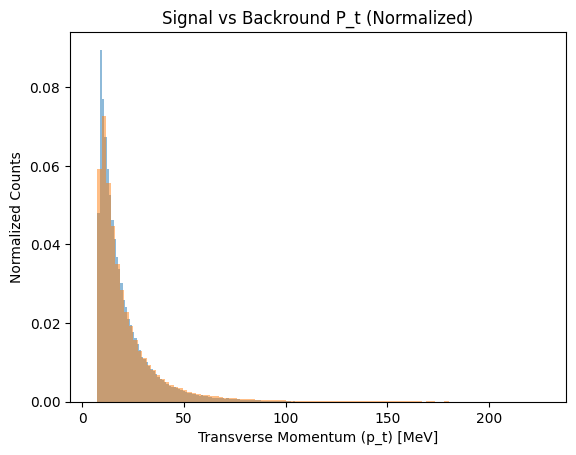

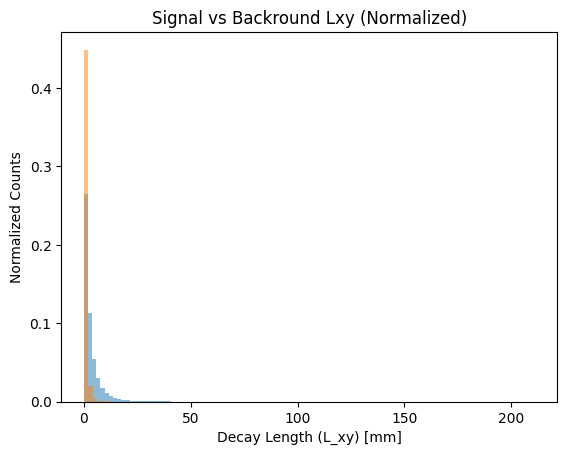

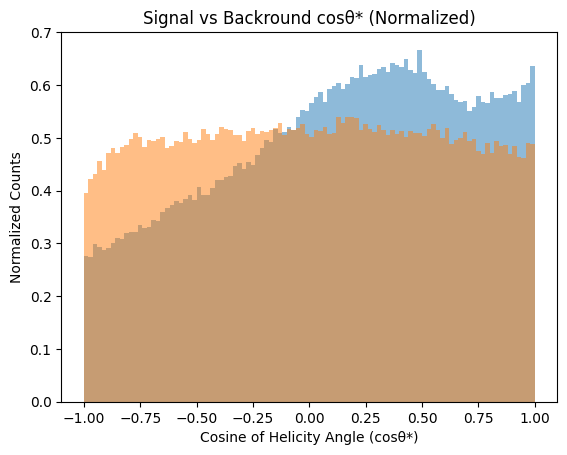

In [239]:
counts, bins, _ = plt.hist(X_train1["DMesons_pt"], bins=100)
counts2, bins2, _ = plt.hist(X_train2["DMesons_pt"], bins=100)
# Normalize the histogram using the formula
density = counts / (sum(counts) * np.diff(bins))
density2 = counts2 / (sum(counts2) * np.diff(bins2))

# Plot the normalized histogram
plt.clf()
plt.bar(bins[:-1], density, width=np.diff(bins), align='edge', alpha=0.5)
plt.bar(bins2[:-1], density2, width=np.diff(bins2), align='edge', alpha=0.5)
plt.title("Signal vs Backround P_t (Normalized)")
plt.xlabel("Transverse Momentum (p_t) [MeV]")
plt.ylabel("Normalized Counts")
plt.show()

counts, bins, _ = plt.hist(X_train1["DMesons_fitOutput__Lxy"], bins=100)
counts2, bins2, _ = plt.hist(X_train2["DMesons_fitOutput__Lxy"], bins=100)
# Normalize the histogram using the formula
density = counts / (sum(counts) * np.diff(bins))
density2 = counts2 / (sum(counts2) * np.diff(bins2))

# Plot the normalized histogram
plt.clf()
plt.bar(bins[:-1], density, width=np.diff(bins), align='edge', alpha=0.5)
plt.bar(bins2[:-1], density2, width=np.diff(bins2), align='edge', alpha=0.5)
plt.title("Signal vs Backround Lxy (Normalized)")
plt.xlabel("Decay Length (L_xy) [mm]")
plt.ylabel("Normalized Counts")
plt.show()

counts, bins, _ = plt.hist(X_train1["DMesons_costhetastar"], bins=100)
counts2, bins2, _ = plt.hist(X_train2["DMesons_costhetastar"], bins=100)
# Normalize the histogram using the formula
density = counts / (sum(counts) * np.diff(bins))
density2 = counts2 / (sum(counts2) * np.diff(bins2))

# Plot the normalized histogram
plt.clf()
plt.bar(bins[:-1], density, width=np.diff(bins), align='edge', alpha=0.5)
plt.bar(bins2[:-1], density2, width=np.diff(bins2), align='edge', alpha=0.5)
plt.title("Signal vs Backround cosθ* (Normalized)")
plt.xlabel("Cosine of Helicity Angle (cosθ*)")
plt.ylabel("Normalized Counts")
plt.show()

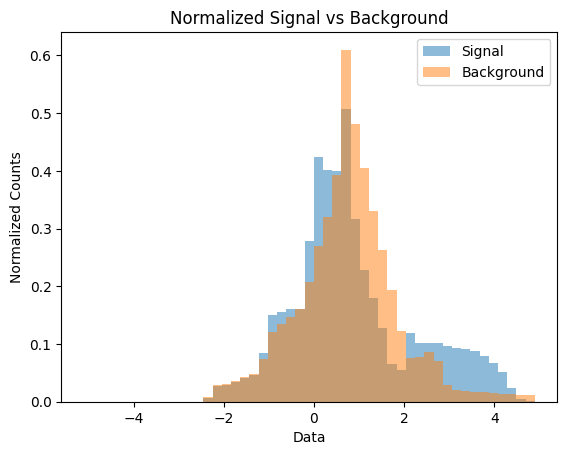

In [240]:
#counts, bins, _ = plt.hist(X_train1, bins=20)
bins = np.linspace(-5, 5, 50)
signal_counts, _ = np.histogram(X_train2, bins=bins, density=True)
background_counts, _ = np.histogram(X_train1, bins=bins, density=True)

# Plot the signal and background histograms on the same plot
plt.bar(bins[:-1], signal_counts, width=np.diff(bins), alpha=0.5, label='Signal')
plt.bar(bins[:-1], background_counts, width=np.diff(bins), alpha=0.5, label='Background')

# Add axis labels and a legend
plt.xlabel('Data')
plt.ylabel('Normalized Counts')
plt.title("Normalized Signal vs Background")
plt.legend()

# Show the plot
plt.show()

In [241]:
wandb.init(
    # set the wandb project where this run will be logged
    project="ATLAS_DNN",

    # track hyperparameters and run metadata with wandb.config
    config={
        "layer_1": 64,
        "activation_1": "relu",
        "dropout_1": 0.5,
        "layer_2": 32,
        "activation_2": "relu",
        "dropout_2": 0.5,
        "output_layer": 1,
        "output_activation": "sigmoid",
        "optimizer": "adam",
        "loss": "binary_crossentropy",
        "metric": "accuracy",
        "epoch": 10,
        "batch_size": 32
    }
)
config = wandb.config

In [242]:
# def get_config(self):
#     return config

class MyModel(Model):
    def __init__(self):
        super(MyModel, self).__init__()
        config = wandb.config
        self.dense1 = Dense(config.layer_1, activation=config.activation_1)
        self.dropout1 = Dropout(config.dropout_1)
        
        self.dense2 = Dense(config.layer_2, activation = config.activation_2)
        self.dropout2 = Dropout(config.dropout_2)
        
        self.dense3 = Dense(config.output_layer, activation=config.output_activation)
        
    def call(self, x):
        x = self.dense1(x)
        x = self.dropout1(x)
        
        x = self.dense2(x)
        x = self.dropout2(x)
        
        x = self.dense3(x)
        
        return x
    
model = MyModel()
model.build(input_shape=(None, X_train.shape[1]))
model.summary()

def custom_accuracy(y_true, y_pred): 
    
    y_pred_binary = tf.cast(tf.round(y_pred), tf.int32)
    y_true = tf.cast(y_true, tf.int32)
    
    correct_predictions = tf.equal(y_true, y_pred_binary)
    accuracy = tf.reduce_mean(tf.cast(correct_predictions, tf.float32))
    
    return accuracy

Model: "my_model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             multiple                  448       
                                                                 
 dropout_2 (Dropout)         multiple                  0         
                                                                 
 dense_4 (Dense)             multiple                  2080      
                                                                 
 dropout_3 (Dropout)         multiple                  0         
                                                                 
 dense_5 (Dense)             multiple                  33        
                                                                 
Total params: 2,561
Trainable params: 2,561
Non-trainable params: 0
_________________________________________________________________


In [243]:
#Compile
import time

start_time = time.time()

model.compile(optimizer=config.optimizer, loss=config.loss, metrics=[custom_accuracy])

early_stop = EarlyStopping(monitor='val_loss', patience=3, verbose=1, mode='min')
#Train
history = model.fit(X_train, y_train, epochs=config.epoch, batch_size=config.batch_size, validation_data=(X_test, y_test), callbacks=[early_stop, WandbCallback(), tf.keras.callbacks.History()])

#Evaluate testing set
loss = model.evaluate(X_test, y_test)
print("Loss: {}".format(loss))

end_time = time.time()
runtime = end_time - start_time
print("Training runtime:", runtime, "seconds")

Epoch 1/10
19993/20000 [============================>.] - ETA: 0s - loss: 0.1625 - custom_accuracy: 0.9364

wandb: ERROR Can't save model in the h5py format. The model will be saved as as an W&B Artifact in the 'tf' format.


INFO:tensorflow:Assets written to: /global/u2/g/gupsingh/ATLAS_DNN/wandb/run-20230421_225411-k64cmee2/files/model-best/assets


INFO:tensorflow:Assets written to: /global/u2/g/gupsingh/ATLAS_DNN/wandb/run-20230421_225411-k64cmee2/files/model-best/assets
wandb: Adding directory to artifact (/global/u2/g/gupsingh/ATLAS_DNN/wandb/run-20230421_225411-k64cmee2/files/model-best)... Done. 0.0s


20000/20000 [==============================] - 36s 2ms/step - loss: 0.1625 - custom_accuracy: 0.9364 - val_loss: 0.0811 - val_custom_accuracy: 0.9672
Epoch 2/10
19993/20000 [============================>.] - ETA: 0s - loss: 0.1074 - custom_accuracy: 0.9596

wandb: ERROR Can't save model in the h5py format. The model will be saved as as an W&B Artifact in the 'tf' format.


INFO:tensorflow:Assets written to: /global/u2/g/gupsingh/ATLAS_DNN/wandb/run-20230421_225411-k64cmee2/files/model-best/assets


INFO:tensorflow:Assets written to: /global/u2/g/gupsingh/ATLAS_DNN/wandb/run-20230421_225411-k64cmee2/files/model-best/assets
wandb: Adding directory to artifact (/global/u2/g/gupsingh/ATLAS_DNN/wandb/run-20230421_225411-k64cmee2/files/model-best)... Done. 0.0s


20000/20000 [==============================] - 34s 2ms/step - loss: 0.1074 - custom_accuracy: 0.9596 - val_loss: 0.0810 - val_custom_accuracy: 0.9660
Epoch 3/10
19998/20000 [============================>.] - ETA: 0s - loss: 0.1027 - custom_accuracy: 0.9612

wandb: ERROR Can't save model in the h5py format. The model will be saved as as an W&B Artifact in the 'tf' format.


INFO:tensorflow:Assets written to: /global/u2/g/gupsingh/ATLAS_DNN/wandb/run-20230421_225411-k64cmee2/files/model-best/assets


INFO:tensorflow:Assets written to: /global/u2/g/gupsingh/ATLAS_DNN/wandb/run-20230421_225411-k64cmee2/files/model-best/assets
wandb: Adding directory to artifact (/global/u2/g/gupsingh/ATLAS_DNN/wandb/run-20230421_225411-k64cmee2/files/model-best)... Done. 0.0s


20000/20000 [==============================] - 33s 2ms/step - loss: 0.1027 - custom_accuracy: 0.9612 - val_loss: 0.0749 - val_custom_accuracy: 0.9703
Epoch 4/10
20000/20000 [==============================] - 33s 2ms/step - loss: 0.1003 - custom_accuracy: 0.9620 - val_loss: 0.0811 - val_custom_accuracy: 0.9676
Epoch 5/10
19999/20000 [============================>.] - ETA: 0s - loss: 0.0989 - custom_accuracy: 0.9625

wandb: ERROR Can't save model in the h5py format. The model will be saved as as an W&B Artifact in the 'tf' format.


INFO:tensorflow:Assets written to: /global/u2/g/gupsingh/ATLAS_DNN/wandb/run-20230421_225411-k64cmee2/files/model-best/assets


INFO:tensorflow:Assets written to: /global/u2/g/gupsingh/ATLAS_DNN/wandb/run-20230421_225411-k64cmee2/files/model-best/assets
wandb: Adding directory to artifact (/global/u2/g/gupsingh/ATLAS_DNN/wandb/run-20230421_225411-k64cmee2/files/model-best)... Done. 0.0s


20000/20000 [==============================] - 34s 2ms/step - loss: 0.0989 - custom_accuracy: 0.9625 - val_loss: 0.0745 - val_custom_accuracy: 0.9704
Epoch 6/10
19991/20000 [============================>.] - ETA: 0s - loss: 0.0976 - custom_accuracy: 0.9630

wandb: ERROR Can't save model in the h5py format. The model will be saved as as an W&B Artifact in the 'tf' format.


INFO:tensorflow:Assets written to: /global/u2/g/gupsingh/ATLAS_DNN/wandb/run-20230421_225411-k64cmee2/files/model-best/assets


INFO:tensorflow:Assets written to: /global/u2/g/gupsingh/ATLAS_DNN/wandb/run-20230421_225411-k64cmee2/files/model-best/assets
wandb: Adding directory to artifact (/global/u2/g/gupsingh/ATLAS_DNN/wandb/run-20230421_225411-k64cmee2/files/model-best)... Done. 0.0s


20000/20000 [==============================] - 34s 2ms/step - loss: 0.0976 - custom_accuracy: 0.9630 - val_loss: 0.0742 - val_custom_accuracy: 0.9709
Epoch 7/10
19983/20000 [============================>.] - ETA: 0s - loss: 0.0960 - custom_accuracy: 0.9635

wandb: ERROR Can't save model in the h5py format. The model will be saved as as an W&B Artifact in the 'tf' format.


INFO:tensorflow:Assets written to: /global/u2/g/gupsingh/ATLAS_DNN/wandb/run-20230421_225411-k64cmee2/files/model-best/assets


INFO:tensorflow:Assets written to: /global/u2/g/gupsingh/ATLAS_DNN/wandb/run-20230421_225411-k64cmee2/files/model-best/assets
wandb: Adding directory to artifact (/global/u2/g/gupsingh/ATLAS_DNN/wandb/run-20230421_225411-k64cmee2/files/model-best)... Done. 0.0s


20000/20000 [==============================] - 34s 2ms/step - loss: 0.0960 - custom_accuracy: 0.9635 - val_loss: 0.0734 - val_custom_accuracy: 0.9700
Epoch 8/10
19981/20000 [============================>.] - ETA: 0s - loss: 0.0955 - custom_accuracy: 0.9637

wandb: ERROR Can't save model in the h5py format. The model will be saved as as an W&B Artifact in the 'tf' format.


INFO:tensorflow:Assets written to: /global/u2/g/gupsingh/ATLAS_DNN/wandb/run-20230421_225411-k64cmee2/files/model-best/assets


INFO:tensorflow:Assets written to: /global/u2/g/gupsingh/ATLAS_DNN/wandb/run-20230421_225411-k64cmee2/files/model-best/assets
wandb: Adding directory to artifact (/global/u2/g/gupsingh/ATLAS_DNN/wandb/run-20230421_225411-k64cmee2/files/model-best)... Done. 0.0s


20000/20000 [==============================] - 33s 2ms/step - loss: 0.0955 - custom_accuracy: 0.9637 - val_loss: 0.0716 - val_custom_accuracy: 0.9717
Epoch 9/10
20000/20000 [==============================] - 33s 2ms/step - loss: 0.0949 - custom_accuracy: 0.9642 - val_loss: 0.0716 - val_custom_accuracy: 0.9713
Epoch 10/10
5000/5000 [==============================] - 6s 1ms/step - loss: 0.0731 - custom_accuracy: 0.9713
Loss: [0.07306626439094543, 0.9712687730789185]
Training runtime: 341.86587405204773 seconds


2023-04-21 22:55:06.284290: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,64]
	 [[{{node inputs}}]]
2023-04-21 22:55:06.300782: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,32]
	 [[{{node inputs}}]]
2023-04-21 22:55:06.509741: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,64]
	 [[{{node inputs}}]]
2023-04-21 22:55:06

In [244]:
wandb.finish()

custom_accuracy,▁▇▇▇▇█████
epoch,▁▂▃▃▄▅▆▆▇█
loss,█▂▂▂▂▁▁▁▁▁
val_custom_accuracy,▃▁▆▃▆▇▆███
val_loss,██▃█▃▃▂▁▁▂
best_epoch,7
best_val_loss,0.07159
custom_accuracy,0.96458
epoch,9
loss,0.09359
val_custom_accuracy,0.97127


------------------------------------------ Finished training, now analyze ------------------------------------------

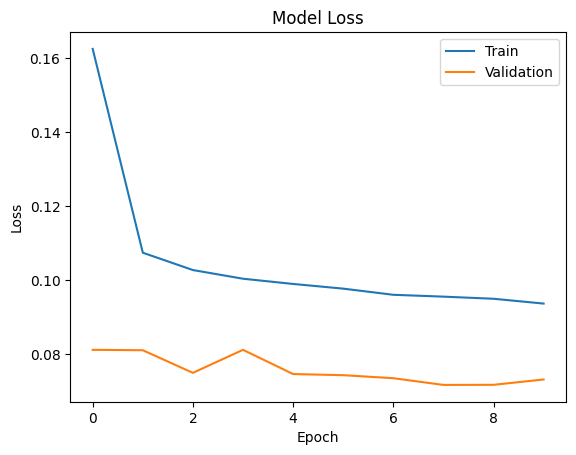

In [245]:
# Plot the training and validation loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

In [246]:
predictions = model.predict(X_test)
predictions[:10]

5000/5000 [==============================] - 5s 1ms/step


array([[4.0451860e-34],
       [1.0000000e+00],
       [1.0000000e+00],
       [9.9991930e-01],
       [5.4361462e-28],
       [9.9719507e-01],
       [7.3552210e-31],
       [9.9998760e-01],
       [3.4675989e-21],
       [1.9013773e-01]], dtype=float32)

In [247]:
predictions1 = model.predict(X_test1)
predictions1[:10]

2500/2500 [==============================] - 2s 961us/step


array([[8.5313139e-19],
       [1.2945375e-27],
       [3.9664167e-26],
       [1.3048651e-05],
       [0.0000000e+00],
       [0.0000000e+00],
       [2.1432735e-02],
       [0.0000000e+00],
       [6.3219631e-20],
       [0.0000000e+00]], dtype=float32)

In [248]:
predictions2 = model.predict(X_test2)
predictions2[:10]

2500/2500 [==============================] - 3s 1ms/step


array([[0.99928755],
       [1.        ],
       [0.9999168 ],
       [0.9999048 ],
       [0.9980385 ],
       [0.9969138 ],
       [0.98775065],
       [0.9994295 ],
       [0.9999994 ],
       [0.90966004]], dtype=float32)

In [257]:
predictions_list = []
D_count = 0
Lambda_count = 0
unclear = 0
for pred in predictions:
    if float(pred) > 0.5:
        predictions_list.append(int(1))
        Lambda_count+=1
    elif float(pred) < 0.5:
        predictions_list.append(int(0))
        D_count+=1
    else:
        unclear+=1
        
print("$D^+$ Count: {}".format(D_count))
print("$\Lambda_C^+ Count: {}".format(Lambda_count))
print("Unknown Particle Count: {}".format(unclear))
np.shape(predictions)

$D^+$ Count: 77797
$\Lambda_C^+ Count: 82203
Unknown Particle Count: 0


(160000, 1)

In [250]:
accuracy = np.mean(predictions_list == y_test)
print("Accuracy: {:.2%}".format(accuracy))

y_test

Accuracy: 97.13%


212188    0
299036    1
475978    1
588988    1
138859    0
         ..
419306    0
390253    1
490030    1
754179    1
319196    1
Name: DMesons_pdgId, Length: 160000, dtype: int64

In [253]:
accuracy1 = np.mean(predictions_list == y_test1)
print("Accuracy: {:.2%}".format(accuracy1))

y_test1

Accuracy: 95.87%


23218     0
20731     0
39555     0
147506    0
314215    0
         ..
54840     0
103       0
339434    0
315677    0
164567    0
Name: DMesons_pdgId, Length: 80000, dtype: int64

In [256]:
accuracy2 = np.mean(predictions_list == y_test2)
print("Accuracy: {:.2%}".format(accuracy2))

y_test2

Accuracy: 98.39%


23218     1
20731     1
39555     1
147506    1
314215    1
         ..
54840     1
103       1
339434    1
315677    1
164567    1
Name: DMesons_pdgId, Length: 80000, dtype: int64

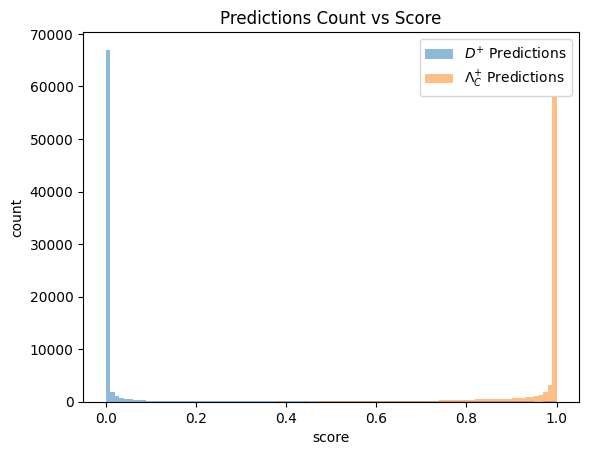

In [258]:
hist = plt.hist(predictions1, bins = 100, label = "$D^{+}$ Predictions", alpha=0.5)
hist2 = plt.hist(predictions2, bins = 100, label = "$\Lambda_C^{+}$ Predictions", alpha=0.5)
plt.xlabel("score")
plt.ylabel("count")
plt.title("Predictions Count vs Score")
plt.legend()
plt.show()

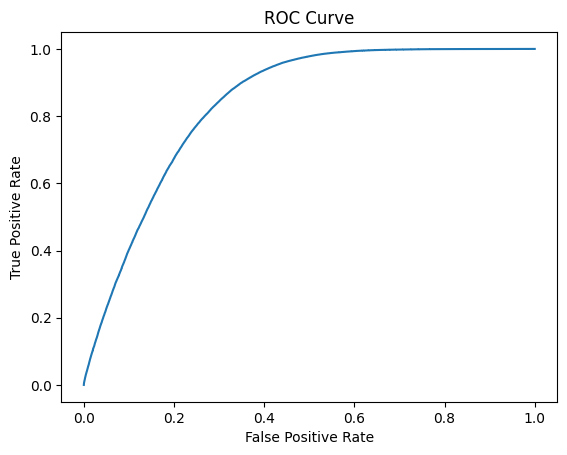

In [96]:
from sklearn.metrics import roc_curve

# Get true labels and predicted probabilities
y_true = list(y_test)
y_pred = predictions

# Calculate TPR and FPR for different threshold values
fpr, tpr, thresholds = roc_curve(y_true, y_pred)

# Plot ROC curve
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()